In [1]:
import pandas as pd
import numpy as np

In [2]:
FILE = 'travistorrent_11_1_2017.csv'
#size = 500000
size = 3000000

In [3]:
#for dataset in pd.read_csv(file, engine='c', chunksize=size):
#    process(dataset)

In [6]:
dataset = pd.read_csv(FILE, sep=',', engine='c',usecols=['gh_team_size','tr_build_id','gh_project_name'],dtype={'gh_team_size': np.int32,
                                                                                                                'tr_build_id': np.float32,
                                                                                                                'gh_project_name': 'category'}
                                                                                                                              , nrows = size, encoding='utf-8')


In [8]:
dataset.gh_team_size.head(1)

0    240
Name: gh_team_size, dtype: int32

In [4]:
%%time
dataset = pd.read_csv(FILE, sep=',', engine='c',dtype={'gh_team_size': np.int32,
                                                        'git_num_all_built_commits': np.int32,
                                                        'gh_num_commit_comments': np.int32,
                                                        'git_diff_src_churn': np.int32,
                                                        'git_diff_test_churn': np.int32,
                                                        'gh_diff_files_added': np.int32,
                                                        'gh_diff_files_deleted': np.int32,
                                                        'gh_diff_files_modified': np.int32,
                                                        'gh_diff_tests_added': np.int32,
                                                        'gh_diff_tests_deleted': np.int32,
                                                        'gh_diff_src_files': np.int32,
                                                        'gh_diff_doc_files': np.int32,
                                                        'gh_diff_other_files': np.int32,
                                                        'gh_num_commits_on_files_touched': np.int32,
                                                        'gh_sloc': np.int32,
                                                        'tr_build_number': np.int32,
                                                        'tr_job_id': np.int32,
                                                        'tr_build_id': np.float32,
                                                        'gh_pull_req_num': np.float32,
                                                        'gh_num_commits_in_push': np.float32,
                                                        'tr_prev_build': np.float32,
                                                        'gh_num_issue_comments': np.float32,
                                                        'gh_num_pr_comments': np.float32,
                                                        'gh_test_lines_per_kloc': np.float32,
                                                        'gh_test_cases_per_kloc': np.float32,
                                                        'gh_asserts_cases_per_kloc': np.float32,
                                                        'gh_description_complexity': np.float32,
                                                        'tr_duration': np.float32,
                                                        'tr_log_setup_time': np.float32,
                                                        'tr_log_num_tests_ok': np.float32,
                                                        'tr_log_num_tests_failed': np.float32,
                                                        'tr_log_num_tests_run': np.float32,
                                                        'tr_log_num_tests_skipped': np.float32,
                                                        'tr_log_testduration': np.float32,
                                                        'tr_log_buildduration': np.float32,

                                                        'gh_project_name': 'category',
                                                        'gh_pr_created_at': 'category',
                                                        'gh_lang': 'category',
                                                        'git_merged_with': 'category',
                                                        'git_branch': 'category',
                                                        'gh_commits_in_push': 'category',
                                                        'git_prev_commit_resolution_status': 'category',
                                                        'git_prev_built_commit': 'category',
                                                        'gh_first_commit_created_at': 'category',
                                                        'git_all_built_commits': 'category',
                                                        'git_trigger_commit': 'category',
                                                        'tr_virtual_merged_into': 'category',
                                                        'tr_original_commit': 'category',
                                                        'gh_pushed_at': 'category',
                                                        'gh_build_started_at': 'category',
                                                        'tr_status': 'category',
                                                        'tr_jobs': 'category',
                                                        'tr_log_lan': 'category',
                                                        'tr_log_status': 'category',
                                                        'tr_log_analyzer': 'category',
                                                        'tr_log_frameworks': 'category',
                                                        'tr_log_bool_tests_failed': 'category',
                                                        'tr_log_tests_failed': 'category',


                                                        'gh_is_pr': np.bool,
                                                        'gh_by_core_team_member': np.bool,
                                                        'tr_log_bool_tests_ran': np.bool}

                                                                                          , nrows = size, encoding='utf-8')

'''
Signature:
    sep - separa por virgula
    nrows - limite de linhas lidas
    encoding - tipo de caracter
    engine - Mecanismo do analisador
    na_values - procura os padrões na|nan como str
    keep_default_na - define como nan os padroes econtrados em na_values
    
'''



CPU times: user 57.7 s, sys: 1.94 s, total: 59.7 s
Wall time: 59.5 s


In [5]:
# props, NAlist = reduce_mem_usage(pd.read_csv(FILE))

<font size=4/>
   * Elimia as colunas não utilizadas

In [6]:
# Eliminando colunas - 
dataset.drop([  'gh_diff_files_added',
                'gh_commits_in_push',
                'gh_diff_files_deleted',
                'gh_diff_files_modified',
                'gh_diff_tests_added',
                'gh_diff_tests_deleted',
                'gh_diff_src_files',
                'gh_diff_doc_files',
                'gh_diff_other_files',
                'gh_sloc',
                'gh_test_lines_per_kloc',
                'gh_test_cases_per_kloc',
                'gh_pull_req_num',
                'gh_description_complexity',
                'git_merged_with',
                'gh_asserts_cases_per_kloc',
              
                'git_prev_built_commit',
              
                'tr_log_status',
                'tr_status',
                'tr_job_id',
                'tr_jobs',
                'tr_build_number',
                'tr_duration',
                'tr_log_lan',
                'tr_log_num_tests_run',
                'tr_log_setup_time',
                'tr_log_analyzer',
                'tr_log_frameworks',
                'tr_log_bool_tests_ran',
                'tr_log_bool_tests_failed',
                'tr_log_tests_failed',
                'tr_log_testduration',
                'tr_log_buildduration'], axis=1, inplace=True)

In [8]:

df_ruby = dataset.dropna() # Remove as linhas NAN

df_ruby['date'], df_ruby['hours'] = df_ruby.gh_pushed_at.str.split(' ').str # Separa a coluna que possui data e hora em duas novas colunas de data hora
    

/home/wagner/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


201673    33
201676    33
201740    21
201742    21
201743    21
201745    21
201815    33
201817    33
201836    33
201839    33
Name: gh_team_size, dtype: int32

<font size=4/> 
   * Testing

In [7]:
projects = dataset.drop_duplicates(['gh_project_name'])
projects = projects.loc[projects['gh_lang']=='ruby']
projects = projects.gh_project_name


* Taxa de commit por participante no projeto- Quantidade total de commits / Quantidade total de participantes

In [36]:
def rate_commit(projects):
    list_rate_commit = []
    
    for project_name in projects:
        # Define projeto
        df_ruby = dataset.loc[dataset['gh_project_name'] == project_name] # Filtro penas o projeto
        #df_ruby = df_ruby.dropna() # Remove as linhas NaN
        
        # Remove linhas duplicadas
        start_build = df_ruby.drop_duplicates(['tr_build_id']) # remove as linhas duplicadas
        start_build = start_build['tr_build_id'] # cria uma serie com os ids das builds unicas do projeto
        
        # Soma de todos push
        num_commit = df_ruby.gh_num_commits_in_push.sum() 
        
        # Quantidade de contribuidores do projeto
        team_size = int(df_ruby.gh_team_size.head(1))
         

        if((num_commit != 0) and (team_size != 0)):
            # Media projeto
            mean_project = len(start_build)/team_size
            
            # Taxa commit
            taxa_commit = (num_commit/ mean_project)
            
            list_rate_commit.append(taxa_commit)
    
    return(list_rate_commit)

In [37]:
list_rate_commit = rate_commit(projects)

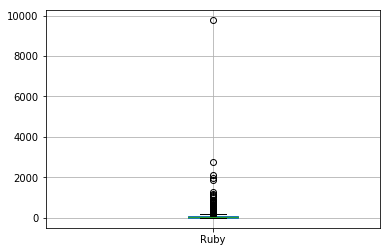

In [38]:
df = pd.DataFrame(list_rate_commit, columns=['Ruby'])

df.boxplot(column=['Ruby'])

In [39]:
list_rate_commit

[9765.934249850568,
 76.34199134199133,
 91.05694387546089,
 3.1345177664974617,
 56.18589743589744,
 307.95508390918064,
 3.197080291970803,
 79.74074074074075,
 5.323453608247422,
 55.86407766990291,
 23.085798816568047,
 712.6943396226416,
 68.58415841584159,
 567.9820627802691,
 1204.7188034188034,
 803.5053846153846,
 281.0204081632653,
 93.35260115606937,
 164.6271676300578,
 16.324817518248175,
 169.0131004366812,
 48.69266055045871,
 118.57575757575756,
 102.22826086956522,
 27.413333333333334,
 1.0629921259842519,
 32.47328244274809,
 110.72243346007605,
 327.3631022326675,
 35.70075757575758,
 872.7991967871486,
 13.10126582278481,
 175.81338028169014,
 546.0520446096655,
 12.027692307692309,
 43.00255754475704,
 59.20245398773006,
 140.3136200716846,
 39.41968911917098,
 198.36923076923077,
 135.41071428571428,
 81.72222222222223,
 78.88951841359773,
 21.88034188034188,
 369.3618881118881,
 55.54430379746835,
 2.6645367412140577,
 43.89763779527559,
 4.533333333333333,
 456.

<font size=4/> 
   * Remove linhas duplicadas

In [25]:
#single_push = df_ruby.drop_duplicates(['tr_build_id']) # remove as linhas duplicadas

#single_push = single_push['tr_build_id'] # cria uma serie com os push unicos do projeto

start_build = df.ruby.tr_build_id

<font size=4/> 
   * Soma de todos push

In [26]:
num_commit = df_ruby.gh_num_commits_in_push.sum() 

<font size=4/> 
   * Duração do projeto

In [27]:
first_data, hora = df_ruby.gh_first_commit_created_at.head(1).str.split(' ').str
first_data = int(first_data.str.replace('-', ''))

In [28]:
last_data,  hora = df_ruby.gh_first_commit_created_at.tail(1).str.split(' ').str
last_data = int(last_data.str.replace('-',''))

In [33]:
date_commit = last_data - first_data

<font size=4/> 
   * Media participante

In [34]:
mean_participante = df_ruby.gh_team_size.sum()/ len(start_build)

<font size=4/> 
   * Taxa de commit

In [35]:
taxa_commit = num_commit/(date_commit * mean_participante)
taxa_commit

0.014350276795791908

In [37]:
df_ruby.head(5)

,tr_build_id,gh_project_name,gh_is_pr,gh_pr_created_at,gh_pull_req_num,gh_lang,git_merged_with,git_branch,gh_num_commits_in_push,git_prev_commit_resolution_status,...,gh_pushed_at,gh_build_started_at,tr_status,tr_job_id,tr_log_status,tr_log_num_tests_ok,tr_log_num_tests_failed,tr_log_num_tests_skipped,data,hora
638680,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-02-17 01:06:32,2013-06-15 12:47:57,passed,8113939,ok,14749.0,0.0,2.0,2013-02-17,01:06:32
638681,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-02-17 01:06:32,2013-06-15 12:47:57,passed,8113941,ok,7260.0,0.0,44.0,2013-02-17,01:06:32
638682,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-02-17 01:06:32,2013-06-15 12:47:57,passed,8113943,ok,7630.0,0.0,77.0,2013-02-17,01:06:32
638683,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-06-15 12:45:17,2013-06-15 12:47:57,passed,8113944,ok,879.0,0.0,0.0,2013-06-15,12:45:17
638684,8113937.0,rails/rails,True,2013-06-12 10:21:13,10925.0,ruby,merge_button,master,2.0,build_found,...,2013-06-15 12:45:17,2013-06-15 12:47:57,passed,8113949,ok,7464.0,0.0,96.0,2013-06-15,12:45:17
